In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
cd ..

/home/wbaik/Code/data_science/temp_folder


In [3]:
pd.options.display.max_rows = 30

In [4]:
fundamental_data = pd.read_csv('10K_data.csv')
price_data = pd.read_csv('./fundamental_data/price_data')

In [5]:
from dateutil import parser
price_data.index = price_data['date'].apply(parser.parse)

In [6]:
to_drop_for_insufficient_data = [ticker for ticker in price_data if len(price_data[ticker][price_data[ticker].isnull()]) > 250]

In [7]:
to_drop_for_insufficient_data

['ftv', 'hpe', 'khc', 'pypl', 'qrvo', 'wrk']

In [8]:
[price_data.drop(ticker, axis=1, inplace=True) for ticker in to_drop_for_insufficient_data]

[None, None, None, None, None, None]

In [9]:
'ftv' in price_data.columns

False

In [10]:
digitized_sectors = {sector: i for i, sector in 
                     enumerate(set(fundamental_data['Sector'].values))}
fundamental_data['Sector_digitize'] = fundamental_data['Sector'].map(digitized_sectors)
reverse_digitized = {digitized_sectors[key]: key for key in digitized_sectors}

In [12]:
columns = fundamental_data.columns
columns = [col for col in columns]

for col in columns[5:8]:
    fundamental_data = fundamental_data.drop(col, axis=1)
    
for col in columns[-5:]:
    fundamental_data = fundamental_data.drop(col, axis=1)

# should be inplace but ...
fundamental_data = fundamental_data.drop('Wikipedia Link', axis=1)
fundamental_data = fundamental_data.drop('Diluted EPS', axis=1)
fundamental_data = fundamental_data.drop('Beta', axis=1)
fundamental_data = fundamental_data.drop('50-Day Moving Average', axis=1)

In [13]:
fundamental_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Symbol', 'Name', 'Enterprise Value',
       'Trailing P/E', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA',
       'Revenue', 'EBITDA', 'Market Cap (intraday)', 'Forward P/E'],
      dtype='object')

In [14]:
fundamental_data.isnull().any()

Unnamed: 0                  False
Unnamed: 0.1                False
Symbol                      False
Name                        False
Enterprise Value            False
Trailing P/E                False
Enterprise Value/Revenue    False
Enterprise Value/EBITDA     False
Revenue                     False
EBITDA                      False
Market Cap (intraday)       False
Forward P/E                 False
dtype: bool

In [15]:
fundamental_data.iloc[:,3:].head()

,Name,Enterprise Value,Trailing P/E,Enterprise Value/Revenue,Enterprise Value/EBITDA,Revenue,EBITDA,Market Cap (intraday),Forward P/E
0,3M Company,1.427800e+11,26.77,4.51,16.08,3.166000e+10,8.880000e+09,1.262300e+11,18.50
1,Abbott Laboratories,1.247200e+11,214.01,4.55,20.93,2.739000e+10,5.960000e+09,1.005400e+11,17.88
2,AbbVie Inc.,1.833600e+11,27.21,6.50,15.10,2.822000e+10,1.214000e+10,1.424500e+11,10.28
3,Accenture plc,9.679000e+10,26.12,2.70,16.53,3.586000e+10,5.850000e+09,9.478000e+10,20.13
4,Activision Blizzard,5.254000e+10,179.33,7.49,23.59,7.020000e+09,2.230000e+09,4.898000e+10,21.52


### This is pretty stupid, but let's give it a try

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

fundamental_transformed = scaler.fit_transform(fundamental_data.iloc[:,4:])

In [17]:
pd.DataFrame(fundamental_transformed).describe()

,0,1,2,3,4,5,6,7
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,0.063647,0.045278,0.250217,0.100272,0.044831,0.054937,0.052583,0.121994
std,0.097944,0.083629,0.210276,0.070084,0.086029,0.093899,0.103886,0.113003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020970,0.015875,0.104535,0.068259,0.007646,0.011971,0.010694,0.065456
50%,0.035524,0.024827,0.191991,0.085357,0.018556,0.025430,0.020248,0.094839
75%,0.062386,0.042597,0.312132,0.117457,0.040155,0.057622,0.048646,0.133241
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.cluster import KMeans
kmeans_transformed = KMeans(n_clusters=10).fit(fundamental_transformed)

In [19]:
kmeans_transformed.labels_

array([0, 0, 0, 0, 2, 4, 1, 8, 4, 5, 8, 4, 8, 8, 8, 4, 8, 1, 2, 1, 8, 8,
       8, 4, 3, 0, 3, 8, 4, 8, 1, 2, 4, 5, 8, 0, 8, 2, 4, 1, 5, 8, 8, 8,
       6, 3, 8, 4, 5, 4, 4, 7, 8, 4, 1, 4, 4, 8, 2, 7, 4, 8, 2, 4, 0, 2,
       4, 1, 8, 0, 0, 2, 4, 8, 2, 8, 4, 5, 4, 8, 0, 2, 4, 4, 8, 4, 4, 8,
       8, 8, 0, 7, 8, 4, 8, 4, 8, 4, 8, 8, 1, 8, 0, 8, 8, 0, 4, 2, 8, 2,
       8, 5, 6, 8, 4, 5, 4, 8, 4, 4, 8, 4, 4, 1, 4, 4, 4, 2, 4, 0, 8, 4,
       6, 0, 4, 4, 8, 4, 2, 2, 8, 4, 8, 2, 8, 2, 1, 1, 8, 8, 4, 4, 4, 5,
       1, 7, 8, 3, 8, 1, 5, 8, 2, 8, 4, 8, 4, 5, 8, 4, 4, 4, 4, 8, 4, 1,
       4, 4, 0, 8, 4, 4, 4, 4, 8, 4, 4, 2, 8, 4, 8, 4, 8, 0, 0, 4, 8, 5,
       4, 4, 2, 2, 8, 1, 4, 0, 8, 0, 4, 4, 8, 2, 1, 8, 2, 8, 8, 4, 4, 4,
       7, 4, 4, 8, 4, 4, 2, 8, 4, 0, 5, 4, 4, 4, 8, 4, 4, 4, 4, 4, 0, 4,
       5, 4, 6, 4, 5, 2, 8, 8, 4, 1, 8, 0, 5, 0, 0, 5, 2, 8, 4, 2, 0, 3,
       2, 4, 4, 8, 8, 2, 2, 1, 4, 8, 1, 4, 8, 0, 8, 0, 8, 4, 8, 4, 8, 4,
       1, 4, 8, 4, 8, 0, 4, 4, 4, 2, 2, 4, 0, 8, 8,

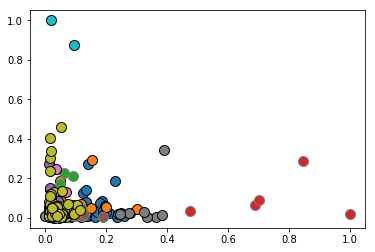

In [20]:
import mglearn
%matplotlib inline
mglearn.discrete_scatter(fundamental_transformed[:, 0], fundamental_transformed[:, 1], kmeans_transformed.labels_, markers='o')
# mglearn.discrete_scatter(
#     kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
#     markers='^', markeredgewidth=2)

### Get yearly % delta, bin them?

In [21]:
delta_price = price_data.iloc[:,3:].pct_change()

In [22]:
delta_price.dropna(inplace=True)

In [23]:
delta_price.rolling(252).mean().dropna().head()

,mmm,abt,abbv,acn,atvi,ayi,adbe,amd,aap,aet,...,wltw,wyn,wynn,xel,xrx,xlnx,xyl,yum,zbh,zts
date,,,,,,,,,,,,,,,,,,,,,
2014-12-10,0.000998,0.000844,0.001271,0.000568,0.000863,0.001284,0.001071,-0.001274,0.001557,0.001199,...,0.000029,0.000734,-0.000495,0.001059,0.000876,0.000493,0.000546,0.000009,0.000889,0.001350
2014-12-11,0.001044,0.000908,0.001199,0.000629,0.000905,0.001314,0.001114,-0.001216,0.001693,0.001268,...,0.000085,0.000801,-0.000428,0.001138,0.001032,0.000518,0.000636,0.000120,0.001018,0.001394
2014-12-12,0.001000,0.000872,0.001116,0.000552,0.000901,0.001207,0.001518,-0.001178,0.001688,0.001301,...,0.000041,0.000796,-0.000438,0.001072,0.000920,0.000410,0.000480,0.000237,0.000967,0.001281
2014-12-15,0.000998,0.000838,0.001138,0.000559,0.000898,0.001188,0.000856,-0.001257,0.001635,0.001279,...,0.000085,0.000768,-0.000551,0.001034,0.000848,0.000330,0.000449,0.000104,0.000906,0.001226
2014-12-16,0.001015,0.000819,0.001040,0.000570,0.000778,0.001064,0.000972,-0.001101,0.001558,0.001196,...,0.000079,0.000681,-0.000701,0.000994,0.000787,0.000260,0.000443,-0.000065,0.000857,0.001089


In [24]:
def sharp_ratio(rets, annual=252):
    return rets.mean() / rets.std() * np.sqrt(annual)

In [25]:
delta_price.rolling(252).apply(sharp_ratio).dropna().head()

,mmm,abt,abbv,acn,atvi,ayi,adbe,amd,aap,aet,...,wltw,wyn,wynn,xel,xrx,xlnx,xyl,yum,zbh,zts
date,,,,,,,,,,,,,,,,,,,,,
2014-12-10,1.642236,1.386848,1.330317,0.884813,0.761087,1.025662,0.988179,-0.793776,1.639174,1.405494,...,0.045503,0.946656,-0.382035,1.860480,0.901125,0.457806,0.559580,0.010675,1.061848,1.661458
2014-12-11,1.719863,1.499581,1.254350,0.982251,0.799703,1.051084,1.028591,-0.757371,1.789424,1.489622,...,0.134239,1.035912,-0.329734,2.002964,1.067341,0.481487,0.653682,0.144883,1.217131,1.718201
2014-12-12,1.639805,1.431858,1.160302,0.853373,0.795777,0.965098,1.334845,-0.733941,1.783830,1.531848,...,0.065580,1.028025,-0.337283,1.881213,0.946677,0.380289,0.492715,0.285786,1.151609,1.565088
2014-12-15,1.636854,1.375719,1.183850,0.863692,0.793636,0.949595,0.828350,-0.782152,1.732573,1.505750,...,0.133249,0.991991,-0.424130,1.808448,0.872479,0.305118,0.461157,0.124333,1.077982,1.500213
2014-12-16,1.661363,1.343696,1.084198,0.880371,0.683238,0.852599,0.951825,-0.686297,1.640775,1.406142,...,0.124039,0.878258,-0.537510,1.741369,0.811591,0.240040,0.454899,-0.077208,1.018428,1.326829


In [26]:
vol = delta_price.rolling(252).std().dropna() * np.sqrt(252)

In [27]:
vol.head()

,mmm,abt,abbv,acn,atvi,ayi,adbe,amd,aap,aet,...,wltw,wyn,wynn,xel,xrx,xlnx,xyl,yum,zbh,zts
date,,,,,,,,,,,,,,,,,,,,,
2014-12-10,0.153428,0.153640,0.241297,0.162207,0.286217,0.315981,0.273767,0.405318,0.239847,0.215337,...,0.159613,0.195800,0.327472,0.143751,0.245490,0.271689,0.246470,0.208754,0.211451,0.205168
2014-12-11,0.153336,0.152899,0.241315,0.161604,0.285711,0.315614,0.273451,0.405241,0.238904,0.214941,...,0.159107,0.195341,0.327809,0.143489,0.244162,0.271425,0.245724,0.209705,0.211223,0.204927
2014-12-12,0.153935,0.153714,0.242786,0.163337,0.285793,0.315747,0.287237,0.405439,0.238870,0.214378,...,0.159662,0.195405,0.327867,0.143838,0.245491,0.272027,0.246047,0.209234,0.211916,0.206737
2014-12-15,0.153942,0.153820,0.242818,0.163321,0.285781,0.315818,0.260860,0.405867,0.238334,0.214524,...,0.160218,0.195384,0.327955,0.144319,0.245369,0.272951,0.245901,0.211456,0.212129,0.206401
2014-12-16,0.154239,0.153812,0.242238,0.163499,0.287650,0.314995,0.257962,0.405255,0.239709,0.214782,...,0.160232,0.195651,0.329396,0.144108,0.244896,0.273066,0.245894,0.211769,0.212600,0.207269


In [28]:
years = ['2013', '2014', '2015', '2016', '2017']

In [29]:
vol_qcut = vol.T.apply(lambda x: pd.qcut(x, 4)) 

In [30]:
vol_qcut.shape

(384, 734)

In [31]:
pd.get_dummies(vol_qcut).T

,mmm,abt,abbv,acn,atvi,ayi,adbe,amd,aap,aet,...,wltw,wyn,wynn,xel,xrx,xlnx,xyl,yum,zbh,zts
"2014-12-10 00:00:00_(0.109, 0.161]",1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
"2014-12-10 00:00:00_(0.161, 0.198]",0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"2014-12-10 00:00:00_(0.198, 0.244]",0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1
"2014-12-10 00:00:00_(0.244, 98.428]",0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
"2014-12-11 00:00:00_(0.109, 0.161]",1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
"2014-12-11 00:00:00_(0.161, 0.197]",0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"2014-12-11 00:00:00_(0.197, 0.244]",0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,1,1
"2014-12-11 00:00:00_(0.244, 98.428]",0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,1,1,0,0,0
"2014-12-12 00:00:00_(0.111, 0.162]",1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
"2014-12-12 00:00:00_(0.162, 0.198]",0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
all_the_groups = [pd.qcut(vol.T[date], 4) for date in vol.T]

In [33]:
vol.T.groupby(all_the_groups[0]).groups

{Interval(0.109, 0.161, closed='right'): Index(['mmm', 'abt', 'afl', 'lnt', 'mo', 'amt', 'awk', 'abc', 'aiv', 'ajg',
        'aiz', 't', 'adp', 'avb', 'bax', 'bxp', 'cpb', 'cb', 'chd', 'cinf',
        'clx', 'cms', 'ko', 'cl', 'ed', 'cost', 'cvs', 'dva', 'de', 'd', 'dte',
        'duk', 'eix', 'efx', 'eqr', 'ess', 'es', 'exr', 'xom', 'frt', 'fis',
        'fisv', 'ggp', 'gis', 'gpc', 'hcp', 'hsic', 'hsy', 'hon', 'itw', 'sjm',
        'jnj', 'kmb', 'kim', 'l', 'mmc', 'mkc', 'mcd', 'maa', 'nee', 'payx',
        'pep', 'pfe', 'pm', 'pnw', 'ppl', 'px', 'pg', 'pgr', 'pld', 'psa', 'o',
        'reg', 'rsg', 'col', 'sre', 'spg', 'so', 'srcl', 'syk', 'syy', 'tmk',
        'trv', 'udr', 'ups', 'utx', 'vtr', 'vrsk', 'vz', 'vno', 'wmt', 'wm',
        'wec', 'wy', 'wltw', 'xel'],
       dtype='object'),
 Interval(0.161, 0.198, closed='right'): Index(['acn', 'aee', 'aep', 'ame', 'aph', 'aon', 'adm', 'azo', 'avy', 'bll',
        'bdx', 'blk', 'ba', 'ca', 'cah', 'cnp', 'ctl', 'cvx', 'ctas', 'cme',
  

In [35]:
delta_last_part = delta_price.iloc[-50:,:]

In [36]:
delta_last_part.head()

,mmm,abt,abbv,acn,atvi,ayi,adbe,amd,aap,aet,...,wltw,wyn,wynn,xel,xrx,xlnx,xyl,yum,zbh,zts
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,-0.003720,0.004715,0.001591,-0.005096,-0.006711,0.000962,-0.000644,0.014615,0.001635,0.003117,...,-0.002501,0.005718,0.031873,-0.002829,0.008991,-0.001060,-0.001615,-0.002473,0.000526,0.002715
2017-09-05,-0.012674,-0.002926,-0.002243,-0.002484,-0.001075,-0.002262,-0.005030,-0.020470,-0.013562,0.000444,...,-0.004268,-0.016459,-0.006415,0.005857,-0.013521,-0.022428,-0.001116,-0.004045,-0.000789,0.004779
2017-09-06,0.005324,0.003131,0.023913,0.010348,-0.016141,0.018932,-0.003370,-0.004644,-0.011586,0.003170,...,0.001021,-0.010041,0.006175,-0.001806,0.000941,-0.006201,0.001928,-0.001441,0.012193,0.003472
2017-09-07,0.011928,0.005870,0.061386,0.023795,0.028594,-0.003227,0.011251,-0.017885,-0.021748,0.009415,...,0.001631,-0.007069,0.016530,0.006667,-0.008398,0.003276,0.007421,0.003412,0.000347,0.023034
2017-09-08,0.006016,0.010286,0.043540,-0.003836,-0.013672,0.002400,-0.000965,-0.030087,0.005339,0.016089,...,0.026873,0.015993,-0.009057,0.006805,-0.010017,-0.010106,0.004799,0.000131,0.000260,-0.002316


In [37]:
for index in range(20, delta_last_part.shape[0]):
    print(np.corrcoef(delta_last_part.iloc[index-20: index+1].values.T))

rolling_correlations = [np.corrcoef(delta_last_part.iloc[index-20: index+1].values.T) for index in range(20, delta_last_part.shape[0])]

[[ 1.          0.17753292  0.31019112 ...  0.13597424 -0.03068237
   0.4009849 ]
 [ 0.17753292  1.          0.40218096 ...  0.17125118  0.16736513
   0.14857982]
 [ 0.31019112  0.40218096  1.         ...  0.46691231 -0.08498641
   0.53052738]
 ...
 [ 0.13597424  0.17125118  0.46691231 ...  1.          0.02207108
   0.36557543]
 [-0.03068237  0.16736513 -0.08498641 ...  0.02207108  1.
   0.15967293]
 [ 0.4009849   0.14857982  0.53052738 ...  0.36557543  0.15967293
   1.        ]]
[[ 1.          0.18117486  0.26531027 ...  0.14887703 -0.09276128
   0.39157626]
 [ 0.18117486  1.          0.40588293 ...  0.16905229  0.16677751
   0.14759835]
 [ 0.26531027  0.40588293  1.         ...  0.44314219 -0.02186157
   0.54560345]
 ...
 [ 0.14887703  0.16905229  0.44314219 ...  1.         -0.01239139
   0.35376003]
 [-0.09276128  0.16677751 -0.02186157 ... -0.01239139  1.
   0.1880516 ]
 [ 0.39157626  0.14759835  0.54560345 ...  0.35376003  0.1880516
   1.        ]]
[[ 1.          0.17060552  0.2263

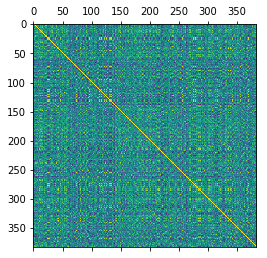

In [69]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.matshow(rolling_correlations[0])

In [42]:
delta_last_part.shape

(50, 384)

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
delta_pca = pca.fit_transform(delta_last_part)

print(pca.components_[:,0])
print(delta_last_part.iloc[0].mean(), delta_last_part.iloc[0].std())

[0.00363759 0.01956009]
0.0036602455213234435 0.009756817627132241


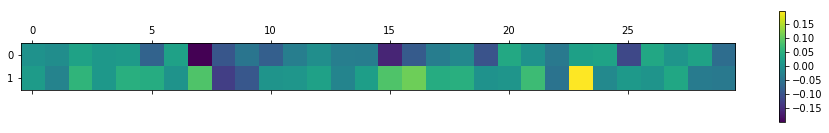

In [58]:
plt.figure(figsize=(8, 8))
plt.matshow(pca.components_[:,:30], cmap='viridis')
plt.colorbar()

In [ ]:
rolling_correlations = [np.corrcoef(delta_last_part.iloc[index-20: index+1].values.T) for index in range(20, delta_last_part.shape[0])]